<a href="https://colab.research.google.com/github/yasvanthika122/ML_Models/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
d=pd.read_csv("https://raw.githubusercontent.com/ezioauditore-tech/AI/main/datasets/Position_Salaries.csv")
d

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
x=d.iloc[:,1:2].values
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [4]:
y=d.iloc[:,2].values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x,y)

LinearRegression()

In [6]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg2=PolynomialFeatures(degree=2)
x_poly2=poly_reg2.fit_transform(x)
lin_reg_2=LinearRegression()
lin_reg_2.fit(x_poly2,y)

LinearRegression()

In [7]:
poly_reg3=PolynomialFeatures(degree=3)
x_poly3=poly_reg3.fit_transform(x)
lin_reg_3=LinearRegression()
lin_reg_3.fit(x_poly3,y)

LinearRegression()

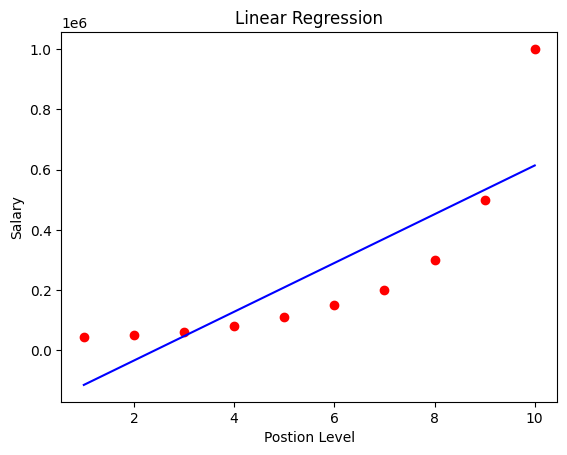

In [8]:
plt.scatter(x,y,color='red')
plt.plot(x,lin_reg.predict(x),color='blue')
plt.title('Linear Regression')
plt.xlabel('Postion Level')
plt.ylabel('Salary')
plt.show()

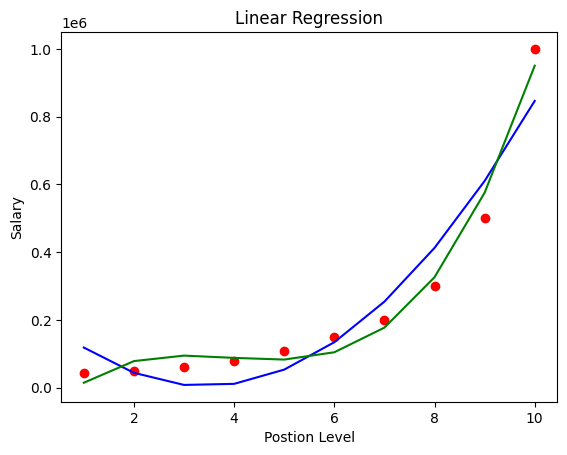

In [9]:
plt.scatter(x,y,color='red')
plt.plot(x,lin_reg_2.predict(x_poly2),color='blue')
plt.plot(x,lin_reg_3.predict(x_poly3),color='green')
plt.title('Linear Regression')
plt.xlabel('Postion Level')
plt.ylabel('Salary')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [11]:
data=pd.read_csv("https://raw.githubusercontent.com/ezioauditore-tech/AI/main/datasets/Real%20estate.csv")
data.head(15)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


In [12]:
data.shape#how many row and column

(414, 8)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [14]:
data.corr

<bound method DataFrame.corr of       No  X1 transaction date  X2 house age  \
0      1             2012.917          32.0   
1      2             2012.917          19.5   
2      3             2013.583          13.3   
3      4             2013.500          13.3   
4      5             2012.833           5.0   
..   ...                  ...           ...   
409  410             2013.000          13.7   
410  411             2012.667           5.6   
411  412             2013.250          18.8   
412  413             2013.000           8.1   
413  414             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4  

<Axes: >

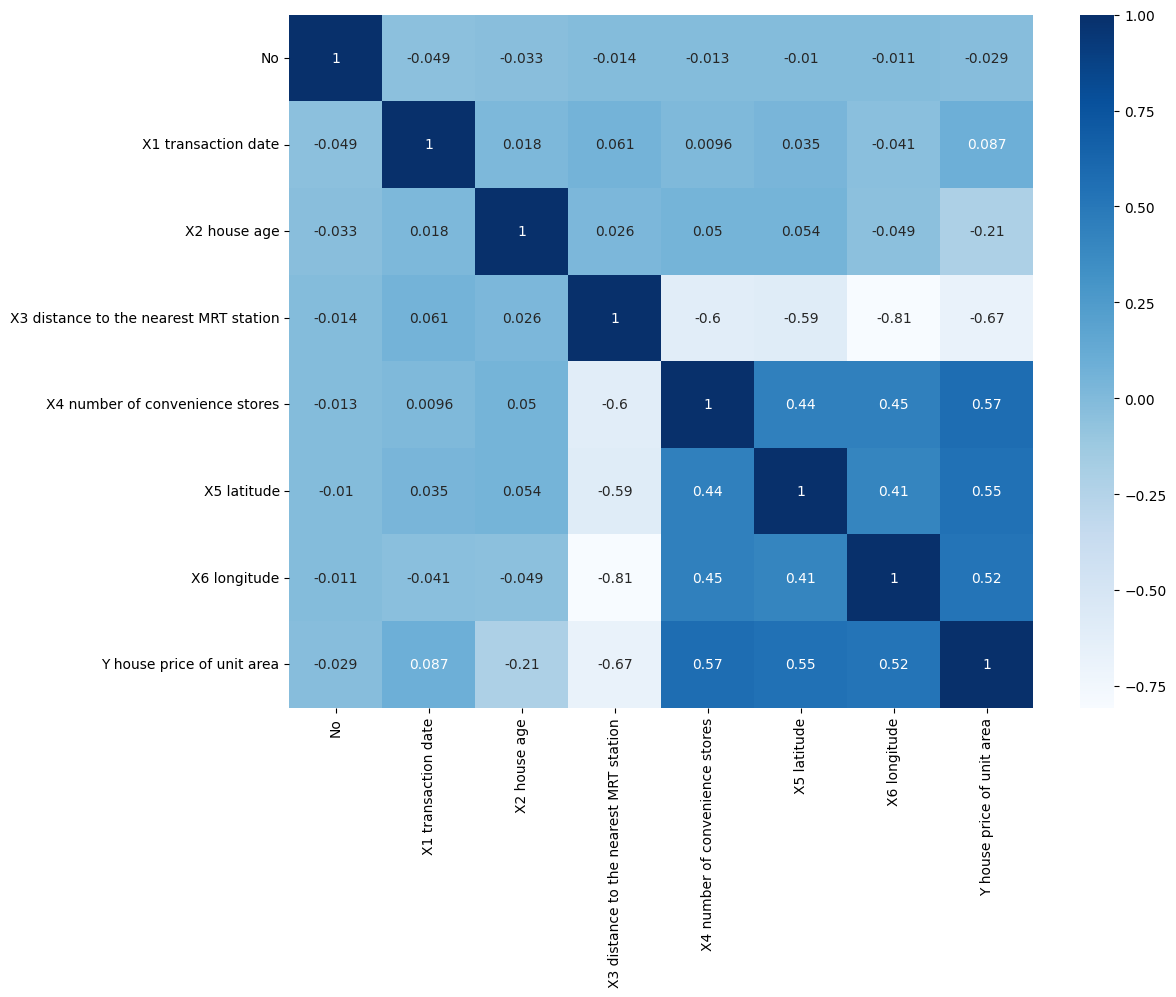

In [15]:
plt.subplots(figsize=(12,9))
sns.heatmap(data.corr(),annot=True,cmap="Blues",)

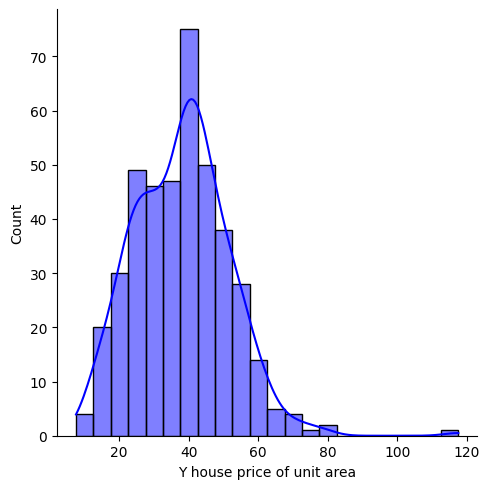

In [16]:
sns.displot(data=data,x='Y house price of unit area',kde=True,color='Blue')

In [17]:
x=data.drop('Y house price of unit area',axis=1)
x

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067


In [18]:
y=data['Y house price of unit area']
y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64

In [19]:
polynomial_reg=PolynomialFeatures(degree=2,include_bias=False)

In [20]:
poly_feat=polynomial_reg.fit_transform(x)
poly_feat.shape

(414, 35)

In [21]:
x_train,x_test,y_train,y_test=train_test_split(poly_feat,y,test_size=0.3,random_state=101)#train test split

In [22]:
polymodel=LinearRegression()

In [23]:
polymodel.fit(x_train,y_train)#fit to model

LinearRegression()

In [24]:
y_pred=polymodel.predict(x_test)

In [25]:
pd.DataFrame({"Y_Test":y_test,"Y_Pred":y_pred,"Residuals":(y_test-y_pred)})

,Y_Test,Y_Pred,Residuals
176,19.2,16.382290,2.817710
347,11.2,3.929467,7.270533
307,24.7,17.438173,7.261827
299,46.1,47.146074,-1.046074
391,31.3,27.340929,3.959071
...,...,...,...
16,70.1,62.313409,7.786591
31,25.0,37.389346,-12.389346
36,22.9,22.208545,0.691455
41,18.2,20.202241,-2.002241


In [26]:
POLY_MAE=metrics.mean_absolute_error(y_test,y_pred)
POLY_MSE=metrics.mean_squared_error(y_test,y_pred)
POLY_RMSE=np.sqrt(POLY_MSE)

In [27]:
##L1,L2 Regression